In [0]:
import pandas as pd

#PEGA OS DADOS DOS FILMES
# movieId, title e genres
uri = "https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula4.1/movies.csv"

filmes = pd.read_csv(uri) # data frame # lê os filmes
filmes.columns = ["filmeId", "titulo", "generos"] # muda o nome das colunas
filmes = filmes.set_index('filmeId') # deixa a coluna "filmeId" como index / coluna princípal
# Transforma a coluna de gêneros em várias colunas de cada um dos tipos de gêneros que aparece no no arquivo csv na coluna gênero
filmes = filmes.join(filmes['generos'].str.get_dummies()).drop('generos', axis=1) 
filmes['ano'] = filmes['titulo'].str.extract(r'.*\((\d+)\)') # Acrescenta uma coluna "ano" e o preenche com os anos extraídos do nome de cada filme
filmes = filmes.dropna() # Deleta as linhas que estejam faltando valores preenchidos

In [69]:
filmes.head() # Imprime as 5 primeiras linhas

,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,ano
filmeId,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1995
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1995
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1995


In [0]:
# PEGA OS DADOS DAS NOTAS DOS FILMES
# userId, movieId, rating e timestamp 
uri = "https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula1.2/ratings.csv"
notas = pd.read_csv(uri)  # data frame # lê as notas dos filmes
notas.columns = ["usuarioId", "filmeId", "nota", "momento"] # Muda o nome das colunas
arredondadas = notas['nota'].round(1) # Arredonda os valores da coluna "nota" para que todas tenham apenas 1 casa decimal

In [71]:
notas.head() # imprime as 5 primeiras notas

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
nota_media = notas.groupby('filmeId')['nota'].mean() # tira a média das notas dos filmes

In [73]:
nota_media.head() # imprime a media das 5 primeiras notas

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [0]:
# Adiciona uma coluna de "Nota média" do filme no dataframe de filmes em ordem decrescente e renomeia o nome da coluna de "nota" para "Nota média"
filmes = filmes.join(nota_media).dropna().sort_values('nota', ascending=False).rename(columns={"nota":"Nota média"})
quantidade_nota = notas.groupby("filmeId")["momento"].count() # Conta a quantidade de notas de cada filme
filmes = filmes.join(quantidade_nota) # Adiciona a coluna quantidade_nota para mostrar o total de votos de cada filme no dataframe filme
filmes = filmes.rename(columns={"momento":"Quantidade de votos"}) # muda o nome da coluna "momento" para "Quantidade de notas"
filmes = filmes.query("`Quantidade de votos`>50") # Filtra os filmes que possuem mais de 50 votos, descatando os outros
filmes["Nota média arredondada"] = (filmes["Nota média"]).round(1).values #Cria uma nova coluna com as médias das notas com apenas uma casa décimal


In [75]:
random_filmes = filmes.sample(10) # pega 10 filmes aleatórios
random_filmes.head()

,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,ano,Nota média,Quantidade de votos,Nota média arredondada
filmeId,,,,,,,,,,,,,,,,,,,,,,,,,
4963,Ocean's Eleven (2001),0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,2001,3.844538,119,3.8
1917,Armageddon (1998),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1998,3.054348,92,3.1
904,Rear Window (1954),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1954,4.261905,84,4.3
6377,Finding Nemo (2003),0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2003,3.960993,141,4.0
163,Desperado (1995),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1995,3.560606,66,3.6


In [76]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# **Visualizando informações dos dados**

In [77]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [78]:
#Mostra a quantidade de notas de cada nota
notas["nota"].value_counts() 

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

#### **Utilizando o matplotlib pelo pandas**

Biblioteca básica para visualização de gráficos

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e006c4ac8>,
      dtype=object)

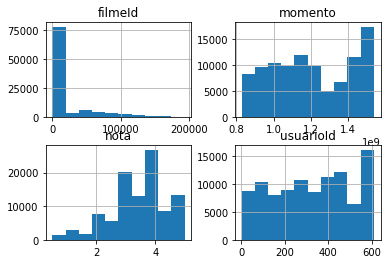

In [79]:
#Plotando histograma de todas as colunas
notas.hist()

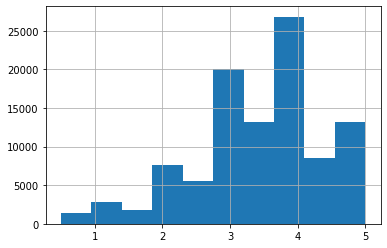

In [80]:
# Plotando histograma de notas
# Mostrando a diferença da quantidade de notas de cada uma
notas["nota"].hist()

# Mais de 25 mil pessoas deu nota 4, sendo a nota mais dada
# Mais ou menos 20 mil pessoas deu nota 3, sendo a segunda nota mais dada

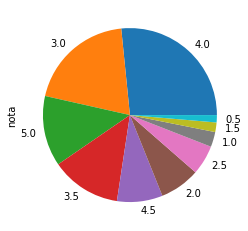

In [81]:
# Plotando um gráfico de pizza 
# Mostrando a diferença da quantidade de notas de cada uma.
# Não muito boa para esse caso. Sempre é melhor utilizar gráfico de barras para comparar números.
notas["nota"].value_counts().plot.pie()

#### **Utilizando a biblioteca seaborn**

Biblioteca para uso de gráficos já com boas práticas ou tendências

In [0]:
import seaborn as sns

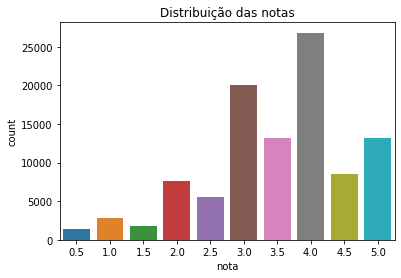

In [83]:
# Plotando histograma de notas
# Mostrando a diferença da quantidade de notas de cada uma
sns.countplot(notas["nota"])
#Para colocar um título no gráfico
import matplotlib.pyplot as plt
plt.title("Distribuição das notas");

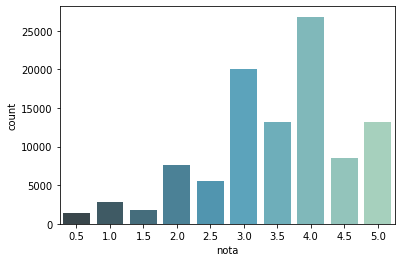

In [84]:
# Mudando a cor das barras usando a opções de palletas do seaborn
palette = sns.color_palette("GnBu_d", 10)
sns.countplot(notas["nota"], palette=palette)

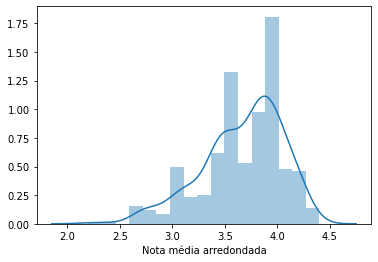

In [85]:
# Plota um histograma mostrando a distribuição da nota média dos filmes
sns.distplot(filmes["Nota média arredondada"])

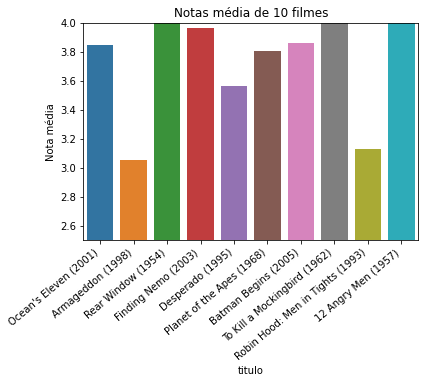

In [86]:
# Plotando a comparação da média de notas entre 10 filmes
p = sns.barplot(data = random_filmes, x = "titulo", y = "Nota média")
# rotacionando em 40º os labels dos tiks (nome dos filmes) com o matplotlib
p.set_xticklabels(p.get_xticklabels(), rotation = 40, horizontalalignment = "right")
plt.title("Notas média de 10 filmes") # Põe um título no gráfico

########ZOOM NO EIXO Y DISTORCENDO A REALIDADE!!!!!!!!!!!!!
plt.ylim(2.5, 4) #Seta o valor mínimo/limite do eixo y, engana na diferença de notas entre os filmes
# Comando para mostrar o plot, não deixando o comando anterior imprimir algumas coisas que não interessa. 
plt.show()

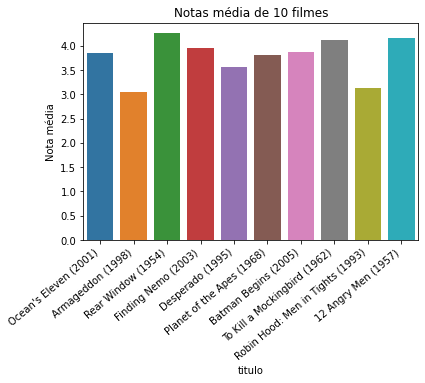

In [87]:
#SEM O ZOOM
# Plotando a comparação da média de notas entre 10 filmes
p = sns.barplot(data = random_filmes, x = "titulo", y = "Nota média")
# rotacionando em 40º os labels dos tiks (nome dos filmes) com o matplotlib
p.set_xticklabels(p.get_xticklabels(), rotation = 40, horizontalalignment = "right")
plt.title("Notas média de 10 filmes") # Põe um título no gráfico
#plt.ylim(2.5, 4) #Seta o valor mínimo/limite do eixo y, engana na diferença de notas entre os filmes
# Comando para mostrar o plot, não deixando o comando anterior imprimir algumas coisas que não interessa. 
plt.show()

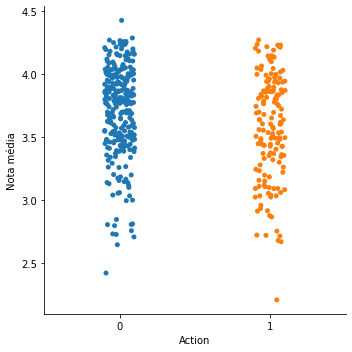

In [88]:
# Plotando um gráfico de distribuição por categoria
# que mostra a média das notas dos filmes que são de "ação" e os que "não são de ação".
sns.catplot(data=filmes, x = "Action", y = "Nota média")

In [89]:
#Plotando um gráfico de boxplot para mostrar as notas de 10 filmes
#Bom para comparar a distribuição de notas de cada filme

#Pega os valores do index de random_filmes em formato de str
#E junta aos valores a "vírgula"
ids_aleatorios = ",".join(random_filmes.index.values.astype(str))

# Interpolação uma string dos ids aleatórios
query = f"filmeId in ({ids_aleatorios})"
query

'filmeId in (4963,1917,904,6377,163,2529,33794,1207,520,1203)'

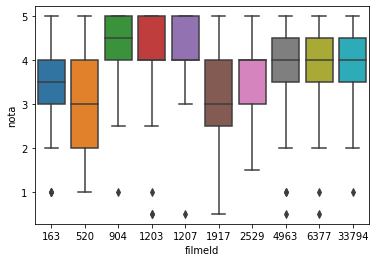

In [90]:
sns.boxplot(data = notas.query(query), x = "filmeId", y = "nota")
plt.show()